In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('./Data/overall_all_070622a.csv', engine='python')


In [4]:
variables = pd.read_csv('./Data/variables.csv')

In [5]:
df.head(2)

,Timestamp,date,unique_id,Rise Partners,Rise Affiliate,zip,gender,sexuality,race,latino,other_languages,marital,age,current_wellbeing,wellbeing_five,wellbeing_two,overall_wellbeing,financial,direction_and_purpose,positive_emotions,negative_emotions,unfairly_treated,covid_vaccine,primary_care_or_other_health_care,there_is_nothing_i_need_help_with,flu_vaccine,food,other_vaccines,housing,rent,utilities,finances,transportation,loneliness,personal_safety,employment,childcare,alcohol_or_drug_use,first_time,hesitancy_reasons,vaccine_commitment,vaccine_status,difference_makers,previous_experience,hours,regular_activities,transportation_help_activities,follow_up_activities,form,vaccine_type
0,2021-08-04T14:00:11Z,8/4/2021,NaN,Center for Popular Democracy,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brief Outreach Form,NaN
1,2021-08-05T22:55:41Z,8/5/2021,NaN,Migrant Clinician's Network,NaN,78756,Female,NaN,NaN,NaN,English,NaN,64,5.0,9.0,NaN,Struggling,NaN,NaN,NaN,NaN,NaN,covid vaccine,NaN,there is nothing i need help with,flu vaccine,food,other vaccines,housing,rent,utilities,general finances,transportation,loneliness,personal safety,employment,childcare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brief Outreach Form,NaN


In [ ]:
df.info()

We have a great deal of null values

In [ ]:
df.isnull().sum()

### Let's make the date a datetime object

In [8]:
# We do not need timestamp and date, and we do not need unique_id

df.drop(columns=['Timestamp', 'unique_id',], inplace=True)

In [9]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [10]:
df['date'].head()

0    2021-08-04
1    2021-08-05
2    2021-08-06
3    2021-08-09
4    2021-08-12
Name: date, dtype: object

In [11]:
df['date'].max()

datetime.date(2022, 4, 25)

In [12]:
df['date'].min()

datetime.date(2021, 8, 4)

We can see that the earliest documented date on this dataset is august 4th 2021, and the most recent date is April 25 2022

#### Make a year column to compare years

In [13]:
df['year'] = pd.to_datetime(df['date']).dt.year

In [14]:
df['year'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year, dtype: int64

### Attempt to clean columns related to race/ethnicity

If I had more time, I would like to create a column as is_poc to track individuals who identified as a person of color or from a ethnic minority. Given the time contraits, I did very simple clearning in the latino and race columns.

In [15]:
# make all entris in 'latino' lower, this way we do not have a difference between 'Yes' and 'yes'

df['latino'] = df['latino'].str.lower()

In [16]:
df['latino'].unique()

array([nan, 'no', 'yes', 'i prefer not to answer'], dtype=object)

In [17]:
df['race'] = df['race'].str.lower()

### Let's look at the needs that have been identified

In [18]:
# Identify needs columns

In [19]:
variables = variables.Column.tolist()

In [20]:
print(variables)

['Timestamp', 'date', 'unique_id', 'Rise Partners', 'Rise Affiliate', 'zip', 'gender', 'sexuality', 'race', 'latino', 'other_languages', 'marital', 'age', 'current_wellbeing', 'wellbeing_five', 'wellbeing_two', 'overall_wellbeing', 'financial', 'direction_and_purpose', 'positive_emotions', 'negative_emotions', 'unfairly_treated', 'covid_vaccine', 'primary_care_or_other_health_care', 'there_is_nothing_i_need_help_with', 'flu_vaccine', 'food', 'other_vaccines', 'housing', 'rent', 'utilities', 'finances', 'transportation', 'loneliness', 'personal_safety', 'employment', 'childcare', 'alcohol_or_drug_use', 'first_time', 'hesitancy_reasons', 'vaccine_commitment', 'vaccine_status', 'difference_makers', 'previous_experience', 'hours', 'regular_activities', 'transportation_help_activities', 'follow_up_activities', 'form', 'vaccine_type']


In [21]:
df['finances'].unique()

array([nan, 'general finances'], dtype=object)

In [22]:
# Let's look at needs and how they relate to each other 

needs = ['food', 'other_vaccines', 'housing', 'rent', 'utilities', 'finances', 'transportation', 'loneliness', 'personal_safety', 'childcare', 'employment', 'alcohol_or_drug_use']

In [23]:
for need in needs:
    print(need, df[need].unique())

food [nan 'food']
other_vaccines [nan 'other vaccines']
housing [nan 'housing']
rent [nan 'rent']
utilities [nan 'utilities']
finances [nan 'general finances']
transportation [nan 'transportation']
loneliness [nan 'loneliness']
personal_safety [nan 'personal safety']
childcare [nan 'childcare']
employment [nan 'employment']
alcohol_or_drug_use [nan]


For the needs field, a need was either identified or not, therefore we can made this data either a 1 or 0 since nan means that the need was not identified and 1 means this particular need was identified.

In [24]:
# we see above that all alcohol or drug use was nan, meaning no responses here, so we will drop it from out list

needs.remove('alcohol_or_drug_use')
needs

['food',
 'other_vaccines',
 'housing',
 'rent',
 'utilities',
 'finances',
 'transportation',
 'loneliness',
 'personal_safety',
 'childcare',
 'employment']

In [27]:
df_needs = df[needs]

df_needs = df_needs.notnull().astype('int')

df_needs

#### For the needs columns, either a need is marked or the column is empty and has a nan, we are going to transform these columns in 1 and 0, with 1 denoting that the need was identified.

In [28]:
for need in needs:
    df[need] = df[need].notnull().astype('int')

In [272]:
df[needs].head(2)

,food,other_vaccines,housing,rent,utilities,finances,transportation,loneliness,personal_safety,childcare,employment
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1


Now that we have transformed the columns, name some analysis on needs

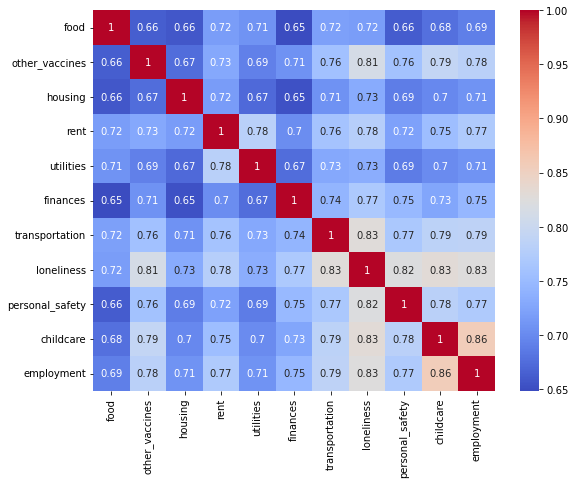

In [33]:
plt.figure(figsize=(9, 7))
ax = sns.heatmap(df_needs.corr(), annot=True, cmap='coolwarm');

We can see that needs are highly correlated with each other. Clients who identify one need is likely to identify others as well. 

### Let's look at vaccination and wellbeing

I explored the vaccine_status column to see how many respondents had been vaccinated. The column needs some cleaning, below I explore the different responses that were obtained, and made a determination on whether the responses indicated that the person has been vaccinated or not. With that information, I created a new column named 'is_vaccinated' to indicate whether someone has been vaccinated or not. 

In [34]:
df['vaccine_status'] = df['vaccine_status'].str.lower()

In [35]:
df['vaccine_status'].unique()

array([nan, 'the second shot of the pfizer covid-19 vaccine',
       'the (one shot) johnson & johnson (janssen) vaccine',
       'something else, not sure, or not yet determined',
       'the second shot of the moderna covid-19 vaccine',
       'the first shot of the moderna covid-19 vaccine',
       'the first shot of the pfizer covid-19 vaccine', 'no', 'yes',
       'partial (1 dose of 2-dose series (e.g., pfizer or moderna))',
       "can't take it", 'likely', 'maybe', 'most likely', 'na',
       'not likely at this time', 'not yet', 'only one', 'pregnant',
       'still thinking', 'thinking about it', 'unlikely', 'yes, n-b',
       'yes, needs second and booster', 'one dose', 'yes both doses',
       'no/don’t want to', 'unsure', 'partial dose', '0', 'n0',
       'refused to say', 'refused', 'no/interested', 'fully vaccinated',
       '1st dose', 'no plan/hesitant', 'referred someone', '12/8/2021',
       '1/6/2022', '1/7/2022', '1/10/2022', '1/11/2022', '1/12/2022',
       '1/13/

In [36]:
vaccine_status = df['vaccine_status'].unique().tolist()
vaccine_status.pop(0)

nan

In [37]:
# build a function to capture clients whose reponded positively to their vaccination status

# Note that I assume that is a data is entered, then this is the date of vaccination
# Note if responses are unsure, or indicates what may be a reason not to vaccinate i.e. pregmant, then I assume no

def is_vaccinated(text):
    if 'no/' in text:
        return 0
    if 'pfizer' in text:
        return 1
    if 'johnson' in text:
        return 1
    if 'moderna' in text:
        return 1
    if 'fully vaccinated' in text:
        return 1
    if 'yes' in text:
        return 1
    if 'dose' in text:
        return 1
    if text == '0':
        return 0
    if 'only one' in text:
        return 1

    for i in text:
        if i == '/' or i=='-':
            return 1
    else:
        return 0

In [ ]:
# Although tedious, by iterating through the responses, we make sure the function has properly captures all cases

for i in vaccine_status:
    print(i, is_vaccinated(i))

In [39]:
# In order for my function above to work, I must convert all nan to str

df['vaccine_status'] = df['vaccine_status'].fillna(value='0')

In [40]:
df['is_vaccinated'] = df['vaccine_status'].apply(lambda x: is_vaccinated(x))

#### Now that we have a column indicated whether someone is vaccinated, we can look at vaccination rates of participants. 

In [41]:
# What proportion of respondends answered positively to vaccination status?

df['is_vaccinated'].mean()

0.4403292181069959

In [42]:
df['is_vaccinated'].value_counts(normalize=True).round(2)

0    0.56
1    0.44
Name: is_vaccinated, dtype: float64

We see that about 44% of participants answered in a way that indicated that they had been vaccinated

### Where is the data coming from, who are the partners?

In [43]:
# Let's look at the rise partners

rise_partners = df['Rise Partners'].unique().tolist()
partners = df['Rise Partners'].value_counts()
partners

Center for Popular Democracy       12083
USAging                             1438
Chromatic Black                     1308
Meals on Wheels America             1288
Migrant Clinician's Network         1250
CACHE-PHI                           1185
National Councils on Aging          1089
Hawai'i Public Health Institute      150
WE in the World                       66
Latino Health Access                  36
Name: Rise Partners, dtype: int64

In [44]:
partners.index

Index(['Center for Popular Democracy', 'USAging', 'Chromatic Black',
       'Meals on Wheels America', 'Migrant Clinician's Network', 'CACHE-PHI',
       'National Councils on Aging', 'Hawai'i Public Health Institute',
       'WE in the World', 'Latino Health Access'],
      dtype='object')

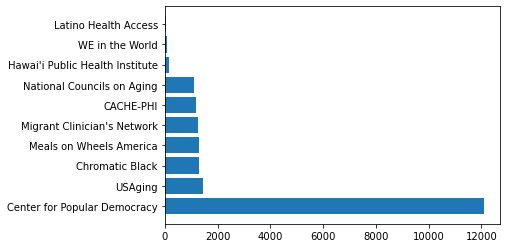

In [45]:
plt.barh(partners.index, partners);

#### What are the vaccination rates by partner?

In [46]:
df.groupby('Rise Partners').mean()[['is_vaccinated']].sort_values(by='is_vaccinated')

,is_vaccinated
Rise Partners,
CACHE-PHI,0.000000
Latino Health Access,0.000000
WE in the World,0.000000
Meals on Wheels America,0.005435
USAging,0.034075
National Councils on Aging,0.063361
Chromatic Black,0.081804
Migrant Clinician's Network,0.206400
Center for Popular Democracy,0.710006


The caveat here is that the data is not balanced, we have few entries for some organizations and a vast amount of entries for others

### Let's look at the wellbeing columns

In [47]:
wellbeing_q = ['current_wellbeing', 'wellbeing_five', 'wellbeing_two', 'overall_wellbeing', 'direction_and_purpose', 'positive_emotions', 'negative_emotions', 'covid_vaccine']

In [48]:
for col in wellbeing_q:
    print(col, df[col].unique())

current_wellbeing [nan  5.  4.  7. 10.  9.  8.  2.  6.  3.  0.  1. 20. 18.]
wellbeing_five [nan  9.  2.  5. 10.  8.  7.  6.  4.  0.  3.  1.]
wellbeing_two [nan  5.  7. 10.  8.  9.  2.  6.  4.  3.  1.  0.]
overall_wellbeing [nan 'Struggling' 'Suffering' 'Thriving']
direction_and_purpose [nan 10.  9.  7.  6.  8.  5.  1.  4.  3.  2.]
positive_emotions [nan 10.  8.  7.  5.  9.  6.  2.  3.  4.  1.  0.]
negative_emotions [nan  6.  3.  4.  5.  9.  7.  2.  1.  8. 10.  0.]
covid_vaccine [nan 'covid vaccine']


In [49]:
# Let's encode covid_vaccine if it is not nan, then we assume the client has been vaccinated

df['covid_vaccine'] = df['covid_vaccine'].notnull().astype('int')

In [50]:
# Overall wellbeing can be to be one-hot-encoded

In [51]:
for column in ['overall_wellbeing']:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies

In [52]:
df.head()

,date,Rise Partners,Rise Affiliate,zip,gender,sexuality,race,latino,other_languages,marital,age,current_wellbeing,wellbeing_five,wellbeing_two,overall_wellbeing,financial,direction_and_purpose,positive_emotions,negative_emotions,unfairly_treated,covid_vaccine,primary_care_or_other_health_care,there_is_nothing_i_need_help_with,flu_vaccine,food,other_vaccines,housing,rent,utilities,finances,transportation,loneliness,personal_safety,employment,childcare,alcohol_or_drug_use,first_time,hesitancy_reasons,vaccine_commitment,vaccine_status,difference_makers,previous_experience,hours,regular_activities,transportation_help_activities,follow_up_activities,form,vaccine_type,year,is_vaccinated,Struggling,Suffering,Thriving
0,2021-08-04,Center for Popular Democracy,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Brief Outreach Form,NaN,2021,0,0,0,0
1,2021-08-05,Migrant Clinician's Network,NaN,78756,Female,NaN,NaN,NaN,English,NaN,64,5.0,9.0,NaN,Struggling,NaN,NaN,NaN,NaN,NaN,1,NaN,there is nothing i need help with,flu vaccine,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Brief Outreach Form,NaN,2021,0,1,0,0
2,2021-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Brief Outreach Form,NaN,2021,0,0,0,0
3,2021-08-09,Hawai'i Public Health Institute,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,NaN,4.0,2.0,NaN,Suffering,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Brief Outreach Form,NaN,2021,0,0,1,0
4,2021-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Brief Outreach Form,NaN,2021,0,0,0,0


In [53]:
df['overall_wellbeing'].value_counts()

Struggling    11159
Thriving       3856
Suffering       437
Name: overall_wellbeing, dtype: int64

Most people who responded to overall welbeing are struggling. We do not have enough representative data on those that are 'suffering' to compare with the other groups. 

#### Are people who are struggling less likely to be vaccinated?

In [54]:
df.groupby('overall_wellbeing')[['current_wellbeing', 'wellbeing_five', 'wellbeing_two', 'overall_wellbeing', 'direction_and_purpose', 'positive_emotions', 'negative_emotions', 'is_vaccinated']].mean().round(2)

,current_wellbeing,wellbeing_five,wellbeing_two,direction_and_purpose,positive_emotions,negative_emotions,is_vaccinated
overall_wellbeing,,,,,,,
Struggling,7.00,6.89,6.16,7.59,6.22,6.11,0.62
Suffering,2.80,3.34,2.54,8.00,10.00,NaN,0.12
Thriving,8.65,9.34,9.14,9.13,8.46,3.53,0.12


I am surprised to see that those who are Thriving only have 12% vaccination rate. 

### Is there a difference in wellbeing metrics between those who are vaccinated and those who are not?

In [55]:
df.groupby('is_vaccinated')['current_wellbeing'].mean().round(2)

is_vaccinated
0    7.18
1    7.41
Name: current_wellbeing, dtype: float64

In [56]:
df.groupby('is_vaccinated')['current_wellbeing'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
is_vaccinated,,,,,,,,
0,8072.0,7.18,2.27,0.0,6.0,8.0,9.0,10.0
1,7380.0,7.41,2.26,0.0,6.0,8.0,10.0,20.0


In [57]:
df.groupby('is_vaccinated')['positive_emotions'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
is_vaccinated,,,,,,,,
0,407.0,7.93,2.05,0.0,7.0,8.0,10.0,10.0
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.groupby('is_vaccinated')['negative_emotions'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
is_vaccinated,,,,,,,,
0,407.0,4.15,2.8,0.0,2.0,4.0,6.0,10.0
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.groupby('latino')['is_vaccinated'].mean().round(2)

latino
i prefer not to answer    0.47
no                        0.67
yes                       0.84
Name: is_vaccinated, dtype: float64

### How does vaccination status relate to needs that were identified?

In [62]:
needs_vaccine = needs + ['is_vaccinated']

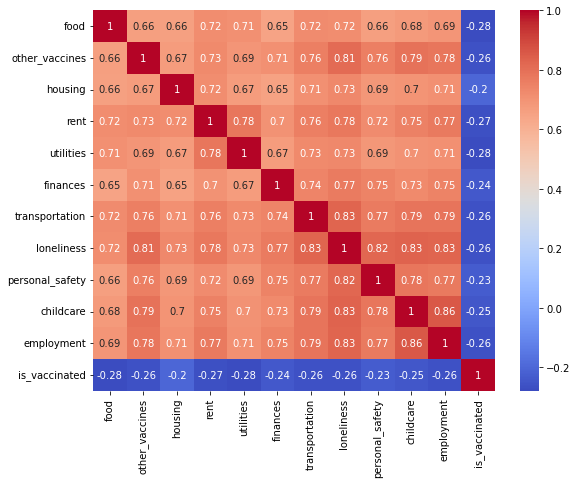

In [63]:
plt.figure(figsize=(9, 7))
ax = sns.heatmap(df[needs_vaccine].corr(), annot=True, cmap='coolwarm');


We can see that there is a negative relationship between needs identified and vaccination status

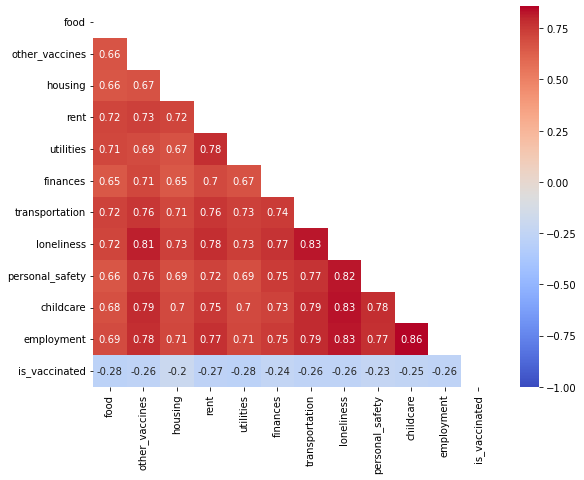

In [64]:
corr= df[needs_vaccine].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

plt.figure(figsize=(9, 7))

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, cmap='coolwarm');

## Gender columns

### Approach to gender columns:

After reviewing some the answer for gender, I will make the following columns to capture the most prevalent gender categories: is_female, is_male, is_nonbinary, is_transgender, is_genderqueer

For people who have checked multiple genders, they will then get assigned a 1 for each category they have identified with. For people who checked both female and male, I will not assume that they made a mistake, but rather they they identify as both, and so will be assigned a 1 in each category. 

In [127]:
df['gender'] = df['gender'].str.lower()

In [ ]:
gender_answers = df['gender'].unique().tolist()
gender_answers.pop(0)
gender_answers

#### Make is_female column

In [129]:
def is_female(text):
    if len(text) > 100:
        return 0
    if 'female to male' in text:
        return 0
    if 'female' in text:
        return 1
    if text == 'f':
        return 1
    if 'femme' in text:
        return 1
    if text == '0':
        return 0
    else:
        return 0

In [130]:
for i in gender_answers:
    print(i, is_female(i))

female 1
male 0
genderqueer, gender nonconforming, or nonbinary 0
transgender 0
male, female 1
i prefer not to answer 0
agender 0
male, genderqueer, gender nonconforming, or nonbinary 0
female, transgender 1
transgender, genderqueer, gender nonconforming, or nonbinary, this question should ask if people identify as cis-male/female or trans-male/female etc.  ... transgender people are not a seperate category of man or woman, they are men and women. 0
genderqueer, gender nonconforming, or nonbinary, agender 0
female, genderqueer, gender nonconforming, or nonbinary 1
male, transgender 0
man 0
none 0
prefer not to answer 0
f 1
m 0
child 0
femme 1
female to male 0
male; femme 1
female; male 1
masc 0
non-binary 0
man  or tr 0
man , prefer not to answer 0
other 0
nonbinary 0
no 0
yes 0


In [131]:
# In order for my function above to work, I must convert all nan to str

df['gender'] = df['gender'].fillna(value='0')

In [132]:
df['is_female'] = df['gender'].apply(lambda x: is_female(x))

In [133]:
df['is_female'].value_counts()

0    12793
1     8105
Name: is_female, dtype: int64

In [134]:
#### is_male column

In [135]:
def is_male(text):
    if len(text) > 100:
        return 0
    if 'female to male' in text:
        return 1
    if text == 'male, female':
        return 1
    if text == 'female; male':
        return 1
    if 'female' in text:
        return 0
    if 'male' in text:
        return 1
    if text == 'm':
        return 1
    if 'man' in text:
        return 1
    if 'masc' in text:
        return 1
    if text == '0':
        return 0
    else:
        return 0

In [ ]:
for i in gender_answers:
    print(i, is_male(i))

In [137]:
df['is_male'] = df['gender'].apply(lambda x: is_male(x))

In [138]:
df['is_male'].value_counts()

0    15121
1     5777
Name: is_male, dtype: int64

In [139]:
# is_nonbinary column

In [140]:
def is_nonbinary(text):
    if 'nonbinary' in text:
        return 1
    if 'non-binary' in text:
        return 1
    else:
        return 0

In [ ]:
for i in gender_answers:
    print(i, is_nonbinary(i))

In [142]:
df['is_nonbinary'] = df['gender'].apply(lambda x: is_nonbinary(x))

In [143]:
df['is_nonbinary'].value_counts()

0    20872
1       26
Name: is_nonbinary, dtype: int64

In [144]:
# is_transgender 

In [145]:
def is_transgender(text):
    if 'transgender' in text:
        return 1
    if text == 'female to male':
        return 1
    if 'tr' in text:
        return 1
    else:
        return 0

In [ ]:
for i in gender_answers:
    print(i, is_transgender(i))

In [147]:
df['is_transgender'] = df['gender'].apply(lambda x: is_transgender(x))

In [148]:
df['is_transgender'].value_counts()

0    20782
1      116
Name: is_transgender, dtype: int64

In [149]:
# genderqueer column

In [150]:
def is_genderqueer(text):
    if 'genderqueer' in text:
        return 1
    else:
        return 0

In [ ]:
for i in gender_answers:
    print(i, is_genderqueer(i))

In [152]:
df['is_genderqueer'] = df['gender'].apply(lambda x: is_genderqueer(x))

In [153]:
df['is_genderqueer'].value_counts()

0    20878
1       20
Name: is_genderqueer, dtype: int64

The columns for those who identify as non-binary, genderqueer, and or transgender captures about 160 individuals in the data set, and although they make up a small proportion of the overall data, I think it's important to capture these feature in an inclusive manner. 

### Let's look at how gender and needs interact, and how gender and vaccination status interacts

In [154]:
gender_needs = needs + ['is_female', 'is_male', 'is_nonbinary', 'is_transgender', 'is_genderqueer']

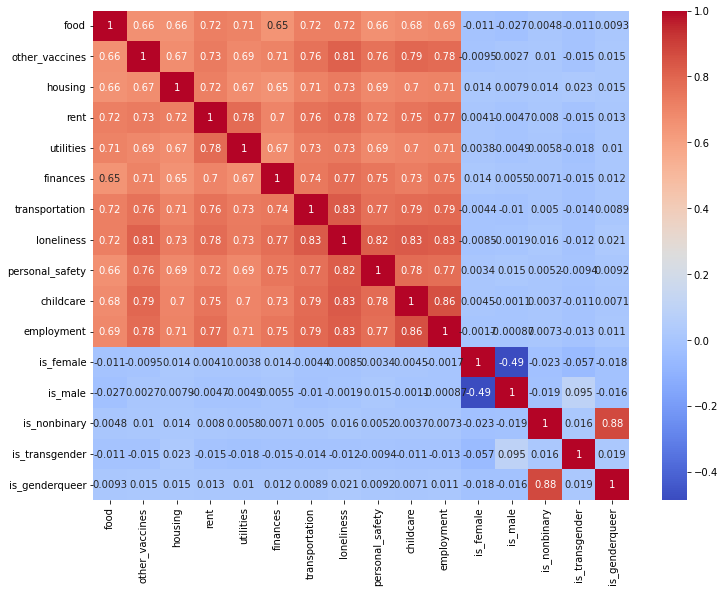

In [155]:
plt.figure(figsize=(12, 9))
ax = sns.heatmap(df[gender_needs].corr(), annot=True, cmap='coolwarm');

There are no strong relationship between gender and the needs that have been identified 

In [156]:
gender_vaccines = ['is_female', 'is_male', 'is_nonbinary', 'is_transgender', 'is_genderqueer', 'is_vaccinated']

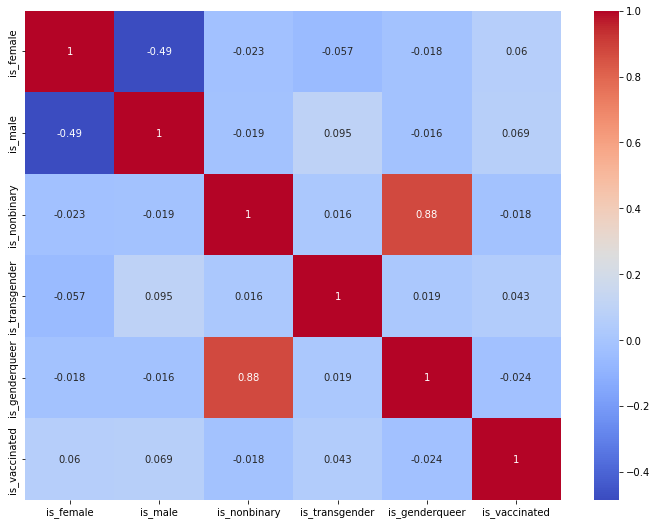

In [157]:
plt.figure(figsize=(12, 9))
ax = sns.heatmap(df[gender_vaccines].corr(), annot=True, cmap='coolwarm');

There are no strong correlatio between gender identification and vaccination status

### Are there any difference in the avarage of needs for those of different gender identities?

In [162]:
gender_cols = ['is_female', 'is_male', 'is_nonbinary', 'is_transgender', 'is_genderqueer']

In [173]:
prop_dict = {}
for gender in gender_cols:
    gender_df = df[df[gender]==1]
    total = gender_df.shape[0]
    vaccinated = gender_df['is_vaccinated'].sum()
    proportion = vaccinated/total
    proportion = proportion.round(2)
    prop_dict[gender] = proportion 

In [189]:
prop_df = pd.DataFrame.from_dict(prop_dict, orient='index')
prop_df.sort_values(by=0)

,0
is_genderqueer,0.05
is_nonbinary,0.19
is_female,0.48
is_male,0.50
is_transgender,0.72


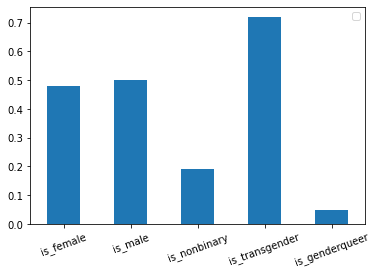

In [188]:
prop_df.plot(kind='bar')
plt.legend('')
plt.xticks(rotation=20);

From the chart and the graph above, we can see that people who identify as nonbinary and as genderqueer have lower vaccination rates. 

In [190]:
df.groupby('is_female').mean()[needs_vaccine].round(2)

,food,other_vaccines,housing,rent,utilities,finances,transportation,loneliness,personal_safety,childcare,employment,is_vaccinated
is_female,,,,,,,,,,,,
0,0.15,0.11,0.13,0.12,0.13,0.12,0.11,0.10,0.11,0.08,0.09,0.42
1,0.14,0.10,0.14,0.12,0.14,0.13,0.11,0.09,0.11,0.09,0.09,0.48


In [191]:
df.groupby("is_male").mean()[needs_vaccine].round(2)

,food,other_vaccines,housing,rent,utilities,finances,transportation,loneliness,personal_safety,childcare,employment,is_vaccinated
is_male,,,,,,,,,,,,
0,0.15,0.10,0.13,0.12,0.14,0.12,0.11,0.1,0.11,0.09,0.09,0.42
1,0.13,0.11,0.14,0.12,0.13,0.13,0.10,0.1,0.12,0.09,0.09,0.50


In [192]:
df.groupby("is_nonbinary").mean()[needs_vaccine].round(2)

,food,other_vaccines,housing,rent,utilities,finances,transportation,loneliness,personal_safety,childcare,employment,is_vaccinated
is_nonbinary,,,,,,,,,,,,
0,0.14,0.10,0.14,0.12,0.14,0.13,0.11,0.10,0.11,0.09,0.09,0.44
1,0.19,0.19,0.27,0.19,0.19,0.19,0.15,0.23,0.15,0.12,0.15,0.19


In [193]:
df.groupby("is_transgender").mean()[needs_vaccine].round(2)

,food,other_vaccines,housing,rent,utilities,finances,transportation,loneliness,personal_safety,childcare,employment,is_vaccinated
is_transgender,,,,,,,,,,,,
0,0.14,0.10,0.14,0.12,0.14,0.13,0.11,0.10,0.11,0.09,0.09,0.44
1,0.09,0.04,0.24,0.05,0.05,0.06,0.05,0.05,0.07,0.04,0.04,0.72


In [194]:
df.groupby("is_genderqueer").mean()[needs_vaccine].round(2)

,food,other_vaccines,housing,rent,utilities,finances,transportation,loneliness,personal_safety,childcare,employment,is_vaccinated
is_genderqueer,,,,,,,,,,,,
0,0.14,0.10,0.14,0.12,0.14,0.13,0.11,0.1,0.11,0.09,0.09,0.44
1,0.25,0.25,0.30,0.25,0.25,0.25,0.20,0.3,0.20,0.15,0.20,0.05


Overall when we look at the average of the needs for those of different gender, we see there are no stark differences. However, it seems that those who identify as non-binary, and genderqueer have highten needs for housing, rent, transpotation, loneliness, personal safety, and employment compared to those who identified as male or female. 

### Did the rate of Vaccination change between 2021 and 2022?

In [195]:
df.groupby('year').mean()[['is_vaccinated']]

,is_vaccinated
year,
2021,0.540472
2022,0.258881


I am surprised that in 2021 clients had a higher rate of vaccination than in 2022, it would be interesting to explore this further

### Let's look at other important information that was capture by the organization as it relates to vaccination

In [196]:
difference_makers = df['difference_makers'].unique().tolist()
len(difference_makers)

107

In [197]:
df['difference_makers'].isnull().sum()

20552

The overwhelming number of respondents did not indicate a difference maker, so this may not be the best column to explore. 

In [198]:
df['hesitancy_reasons'].notnull().sum()

957

While many did not respond to the hesistancy question, significantly more people responded to this question than the difference maker

In [199]:
hesitancy = df['hesitancy_reasons'].unique().tolist()
len(hesitancy)

182

There were 182 unique responses to hesistency

### Exploratory NLP on vaccine hesistancy

In [200]:
hesistancy_df = df[['hesitancy_reasons']].copy(deep=True)

In [201]:
hesistancy_df.dropna(inplace=True)

In [202]:
hesistancy_df.shape

(957, 1)

In [203]:
hesistancy_text = hesistancy_df['hesitancy_reasons']

In [204]:
import plotly
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

In [205]:
cv = CountVectorizer(stop_words='english', max_df=.90, min_df=2)
cv.fit(hesistancy_text)

CountVectorizer(max_df=0.9, min_df=2, stop_words='english')

In [206]:
text_cv = cv.transform(hesistancy_text)

In [207]:
text_cv.shape

(957, 66)

In [208]:
text_df = pd.DataFrame(text_cv.A, columns=cv.get_feature_names_out())

In [209]:
text_df.sum().sort_values(ascending=False).head(10)

vaccine     1182
covid        537
19           536
didn         395
did          361
hesitate     341
making       341
concerns     341
don          248
learned      244
dtype: int64

Because we know that we are looking for the most common words that describe people's hesistancy to get the covid-19 vaccine, we can drop the words vaccine, covid, and 19

In [210]:
text_df.drop(columns=['vaccine', 'covid', '19'], inplace=True)

In [211]:
text_df.sum().sort_values(ascending=False).head(15)

didn           395
did            361
concerns       341
making         341
hesitate       341
don            248
information    244
learned        244
really         235
vaccines       226
site           225
effects        217
concerned      216
potential      216
scared         176
dtype: int64

### Most common words used to describe vaccine hesitancy (and least common words)

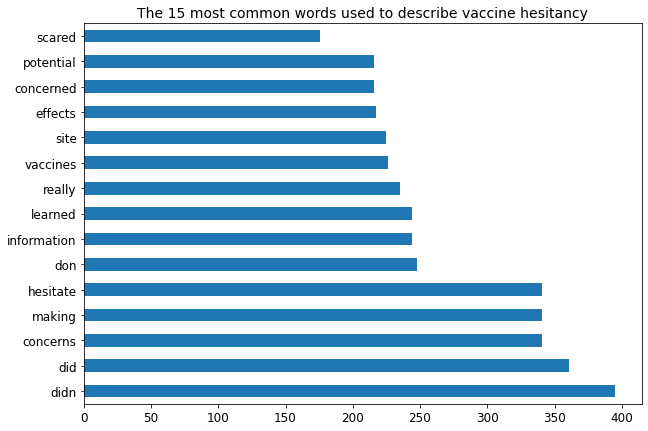

In [212]:
plt.figure(figsize=(10, 7))
text_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('The 15 most common words used to describe vaccine hesitancy', fontsize=14);

We can see that among the top words that described individuals hesistance to vaccination were concerns, information, learned, effects, site, potential, and scared

In [213]:
text_df.sum().sort_values(ascending=False).tail(20)

general        65
commitments    59
child          59
needed         57
virus          53
job            52
work           51
kids           47
risk           46
high           46
busy           46
coronavirus    46
free           40
cost           40
hesitant       37
booster        14
vaccinated      3
dose            2
needle          2
religion        2
dtype: int64

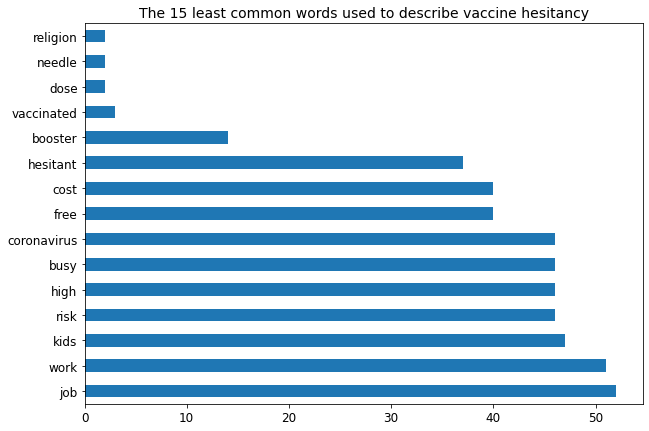

In [214]:
plt.figure(figsize=(10, 7))
text_df.sum().sort_values(ascending=False).tail(15).plot(kind='barh')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('The 15 least common words used to describe vaccine hesitancy', fontsize=14);

Among the least common words that were used to describe hesitancy was job, work, risk, free, cost, dose, needs, and religion

### Identified areas for future cleaning of the data:

With the limited time that I have to work on this dataset, I was not able to do all the cleaning necessary to begin doing other modeling work. As many say, over 80% of data science is cleaning and preparing the data. 

I noticed that there is a lot more cleaning to be done on several columns, I would very much like to work on the race column, as well as age, which not only has intergers but also dates. 

It would also be great to do further work with this data after getting further information about where the data came from, and what are Dawn Chorus Group's priority. 

If I get the opportunity to work with this data again, I would enjoy doing some modeling work. 

## Modeling

In [234]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, recall_score,
accuracy_score, plot_roc_curve, roc_auc_score, recall_score,
precision_score, f1_score, classification_report, RocCurveDisplay)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

#### Modeling 

While many features require additional cleaning before we can model with them, we do have a few avialable. Because we have a column to indicate whether someone is vaccinated, and we also have clean futures that indicate whether a need was identified, we can easily model the effects of a need being identified and it's effect on whether someone is vaccinated.

In [240]:
X = df[needs]
y = df['is_vaccinated']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [241]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [242]:
lr.score(X_train, y_train)

0.5913354175971416

In [243]:
lr.score(X_test, y_test)

0.5858373205741627

About 58% of the variation in vaccination can be explained by the model based on someone's needs

#### Calculate the odd rations for each variable

In [269]:
list(zip(X.columns, np.exp(lr.coef_[0])))

[('food', 0.4581241465901734),
 ('other_vaccines', 0.3964373397674211),
 ('housing', 1.7207275861911948),
 ('rent', 0.6508260098563532),
 ('utilities', 0.443839256612498),
 ('finances', 0.8091882016622088),
 ('transportation', 0.6651890663090702),
 ('loneliness', 0.6197879400937659),
 ('personal_safety', 1.2182524691419745),
 ('childcare', 0.7635391588137883),
 ('employment', 0.36890403680333517)]

In [271]:
list(zip(X.columns, np.exp(lr.coef_[0])-1))

[('food', -0.5418758534098266),
 ('other_vaccines', -0.6035626602325789),
 ('housing', 0.7207275861911948),
 ('rent', -0.3491739901436468),
 ('utilities', -0.556160743387502),
 ('finances', -0.19081179833779116),
 ('transportation', -0.33481093369092985),
 ('loneliness', -0.3802120599062341),
 ('personal_safety', 0.2182524691419745),
 ('childcare', -0.2364608411862117),
 ('employment', -0.6310959631966648)]

#### Coefficients:

Notice that many of the coefficients have a log ratio less than 1, meaning that for individuals who were identified as having that need, they were less likely to be vaccinated. 

- Food: those who were identified as having a food needs were about 54% less likely to be vaccinated
- Other Vaccines: those who were identified as having needs for other vaccines were 60% less likely to be vaccinated
- Rent: those who have housing needs were 35% less likely to be vaccinated
- Utilities: those who identified a utilities need were 56% less likely to be vaccinated
- Finances: those with a financial need were 19% less likely to be vaccinated
- Transportation: those with a need in transportation were 33% less likely to be vaccinated 
- Loneliness: Those who identified a need in loneliness were 38% less likely to be vaccinated
- Childcare: those who identified a need for childcare were 23% less likely to be vaccinated 
- Employment: those who identified as having a need for employment were 63% less likely to be vaccinated



In [276]:
df.to_csv('./Data/hrsaplus.csv', index=False)